## Facial Recognition:-


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def build_siamese_model(input_shape):
    # Define the input layer
    input_left = Input(input_shape)
    input_right = Input(input_shape)

    # Shared Convolutional Neural Network
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoded feature vectors for left and right inputs
    encoded_left = model(input_left)
    encoded_right = model(input_right)

    # Euclidean distance between the encoded vectors
    distance = tf.keras.layers.Lambda(lambda tensors: tf.keras.backend.abs(tensors[0] - tensors[1]))([encoded_left, encoded_right])

    # Output layer
    output = layers.Dense(1, activation='sigmoid')(distance)

    # Siamese Network model
    siamese_model = models.Model(inputs=[input_left, input_right], outputs=output)

    return siamese_model



In [3]:
# Example usage
input_shape = (28, 28, 1)  # Example shape for MNIST images
model = build_siamese_model(input_shape)
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 128)       │    109,184 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128)       │          0 │ sequential_1[0][… │
│                     │                   │            │ sequential_1[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ lambda_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,313 (427.00 KB)

 Trainable params: 109,313 (427.00 KB)

 Non-trainable params: 0 (0.00 B)

### Siamese Neural Network:-

### Use Case:-
* Face Recognition.
* Signature Varification.

A Siamese neural network (SNN) is a type of artificial neural network that uses the same weights to calculate similar output vectors from two different input vectors. SNNs are made up of two or more identical sub-networks, each with the same configuration, parameters, and weights. SNNs are used to compute similarity functions and identify if two data points are dissimilar

### Both Network have same weight and Bias.
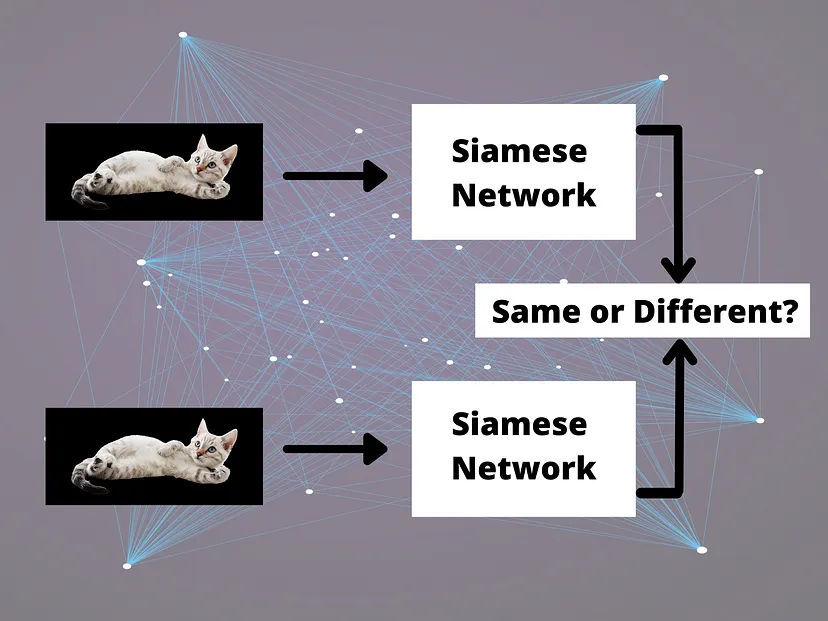

### Here's how SNNs work:
Similar and dissimilar images are exposed to the network.
The network calculates the Euclidean distances between the images.
The distance is reduced for identical signatures, and the distance is increased for different signatures.
The network returns a similarity value, with a high score indicating that the objects are similar and a low score indicating that they are different. 

### SNNs have some limitations, including:
They struggle when the target appearance changes significantly in subsequent frames, leading to tracking failures.
They also face challenges in distinguishing the target from similar objects in the frame. 


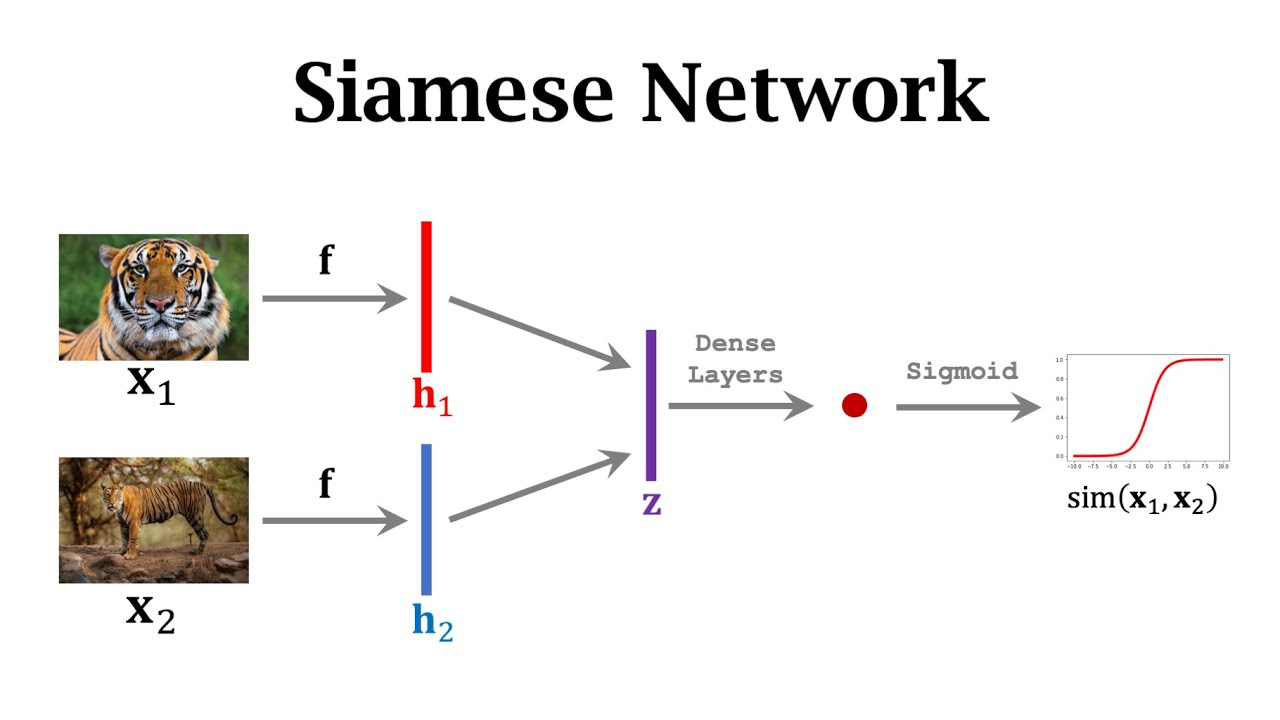

## Loss Function in Siamese Neural Network:-

* Triplet Loss.
* Contrastive Loss.

### Triplet Loss:-

`input_anchor`, `input_positive`, `input_negative`

the triplet_loss function is defined to compute the triplet loss. The build_siamese_model function now takes three inputs: input_anchor, input_positive, and input_negative. It then processes each input through the shared convolutional neural network to get their respective encoded feature vectors. Finally, it outputs these feature vectors as the model's output.

![Screenshot 2024-05-04 201719.png](<attachment:Screenshot 2024-05-04 201719.png>)
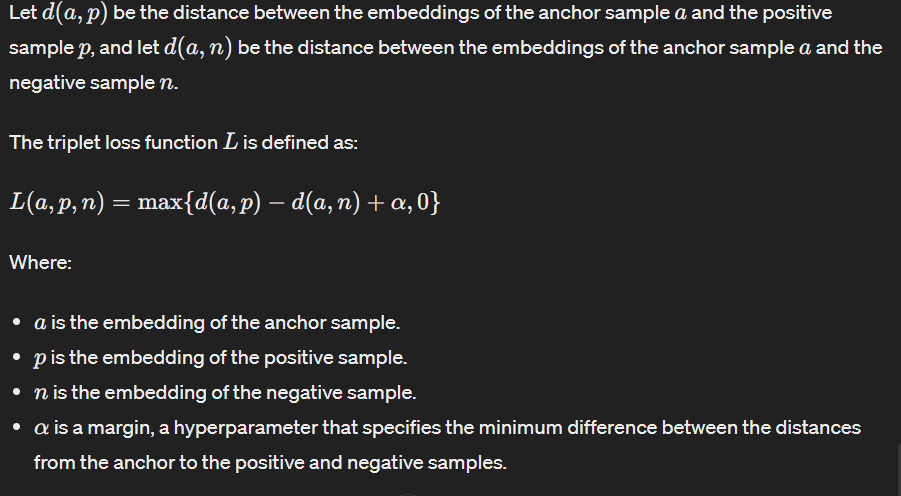

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras import backend as K

def triplet_loss(y_true, y_pred, alpha = 0.2):
    """
    Triplet loss function.
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
                anchor -- the encodings for the anchor images, of shape (None, 128)
                positive -- the encodings for the positive images, of shape (None, 128)
                negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    # Compute the triplet loss
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    
    return loss

def build_siamese_model(input_shape):
    # Define the input layer
    input_anchor = Input(input_shape)
    input_positive = Input(input_shape)
    input_negative = Input(input_shape)

    # Shared Convolutional Neural Network
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoded feature vectors for anchor, positive, and negative inputs
    encoded_anchor = model(input_anchor)
    encoded_positive = model(input_positive)
    encoded_negative = model(input_negative)

    # Output layer
    output = layers.Lambda(lambda x: [x[0], x[1], x[2]])([encoded_anchor, encoded_positive, encoded_negative])

    # Siamese Network model
    siamese_model = models.Model(inputs=[input_anchor, input_positive, input_negative], outputs=output)

    return siamese_model

# Example usage
input_shape = (28, 28, 1)  # Example shape for MNIST images
model = build_siamese_model(input_shape)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss=triplet_loss)



Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 128)       │    109,184 │ input_layer_6[0]… │
│ (Sequential)        │                   │            │ input_layer_7[0]… │
│                     │                   │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ [(None, 128),     │          0 │ sequential_2[0][… │
│                     │ (None, 128),      │            │ sequential_2[1][… │
│                     │ (None, 128)]      │            │ sequential_2[2][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,184 (426.50 KB)

 Trainable params: 109,184 (426.50 KB)

 Non-trainable params: 0 (0.00 B)

## Contrastive Loss:-

![Screenshot 2024-05-04 201508.png](<attachment:Screenshot 2024-05-04 201508.png>)
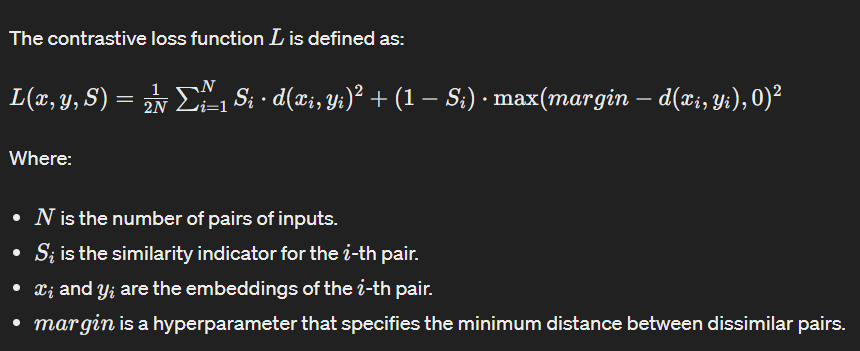

### This loss function consists of two parts:

* The first part penalizes the distance between similar pairs, encouraging them to be close together.
* The second part penalizes the distance between dissimilar pairs, pushing them apart by at least a margin.

The contrastive_loss function computes the contrastive loss based on the Euclidean distance between the anchor and positive/negative examples. The margin parameter defines the minimum distance that should be maintained between similar pairs (anchor-positive) and dissimilar pairs (anchor-negative).

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def contrastive_loss(y_true, y_pred, margin=1):
    """
    Contrastive loss function.
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- Euclidean distances between the anchor and the positive/negative examples, tensor of shape (None, 1)
    margin -- margin for the contrastive loss
    
    Returns:
    loss -- real number, value of the loss
    """
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

def euclidean_distance(vectors):
    """
    Compute Euclidean distance between two vectors.
    
    Arguments:
    vectors -- tuple containing two tensors of shape (batch_size, features)
    
    Returns:
    distance -- Euclidean distance between the two input vectors
    """
    x, y = vectors
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

def build_siamese_model(input_shape):
    # Define the input layer
    input_left = Input(input_shape)
    input_right = Input(input_shape)

    # Shared Convolutional Neural Network
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoded feature vectors for left and right inputs
    encoded_left = model(input_left)
    encoded_right = model(input_right)

    # Calculate Euclidean distance between the encoded vectors
    distance = layers.Lambda(euclidean_distance)([encoded_left, encoded_right])

    # Siamese Network model
    siamese_model = models.Model(inputs=[input_left, input_right], outputs=distance)

    return siamese_model

# Example usage
input_shape = (28, 28, 1)  # Example shape for MNIST images
model = build_siamese_model(input_shape)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss=contrastive_loss)



Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 128)       │    109,184 │ input_layer_16[0… │
│ (Sequential)        │                   │            │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 1)         │          0 │ sequential_5[0][… │
│                     │                   │            │ sequential_5[1][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,184 (426.50 KB)

 Trainable params: 109,184 (426.50 KB)

 Non-trainable params: 0 (0.00 B)